<a href="https://colab.research.google.com/github/danielShz/Alura-Flexbox-e-Grid/blob/main/DANIEL_ARRUDA_PONTE_Projeto_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descrição da modelagem

O tabuleiro do jogo descrito no trabalho, consiste em 40 casas, as quais cada jogador pode acessar por meio da rolagem de dois dados, movendo-se de acordo com a soma desses dados – com números iguais ou números diferentes. Se o jogador obtém dois números iguais no lançamento, ele joga novamente, caso contrário ele apenas se move normalmente. Caso o jogador obtenha 3 lançamentos com números iguais ocorrendo em sequência, ele vai para a prisão – casa 20 – com o *status* de **prisioneiro**. Nessa situação, o jogador pode passar no máximo 3 rodadas preso, podendo ser liberto caso obtenha um lançamento com números iguais. Esse processo de liberação caracteriza-se por uma simples mudança de *status* do jogador, trocando para **livre** sem alterar sua posição no tabuleiro.

| Soma | Probabilidade (números diferentes) | Probabilidade (números iguais) |
| --- | --- | --- |
| 2 | 0 | 1 / 36 |
| 3 | 1 / 18 | 0 |
| 4 | 1 / 18 | 1 / 36 |
| 5 | 1 / 9 | 0 |
| 6 | 1 / 9  | 1 / 36 |
| 7 | 1 / 6 | 0 |
| 8 | 1 / 9 | 1 / 36 |
| 9 | 1 / 9 | 0 |
| 10 | 1 / 18 | 1 / 36 |
| 11 | 1 / 18 | 0 |
| 12 | 0 | 1 / 36 |

*Tabela 1: Distribuição de probabilidade da soma de dois dados*

Para modelar como um jogador se moverá no tabuleiro, o cálculo das probabilidades se focará no lançamento de dois dados honestos, atentando-se à situação da rolagem de números distintos e de números iguais. Inicialmente, pensando apenas na posição do jogador, haveria apenas 40 estados para serem modelados, um para cada casa do tabuleiro. No entanto, devemos considerar mais estados que afetam a forma de movimentar-se no tabuleiro de acordo com a quantidade de lançamentos de valores iguais.

Um exemplo não abrangido pelo modelo 40x40, é representado pela situação na qual o jogador obteve dois lançamentos com valores iguais, acarretando numa maior probabilidade de ir para à prisão quando comparado com um jogador que está na mesma posição e não lançou números iguais. A partir disso, surge a necessidade de armazenar estados auxiliares, pois a Cadeia de Markov possui a propriedade de calcular a probabilidade de atingir um estado com base num estado imediatamente anterior, o que é impossível no caso do terceiro lançamento de valores iguais, por exemplo, pois deve-se ter ciência da ocorrência dos dois lançamentos anteriores antes do jogador ser preso. Dessa forma, o modelo aumenta para 120x120, com o intuito de armazenar o estado de lançar números iguais pela primeira vez (*status* = **suspeito**) e pela segunda vez (*status* = **muito suspeito**) numa determinada posição do tabuleiro.

Além disso, há o contexto de estar **preso**, cujas implicações para o jogador alteram a distribuição de probabilidade da futura posição no tabuleiro após o lançamento dos dados. Nesse caso, deve-se adicionar dois estados a mais: primeira rodada **preso** (*status* = **recém prisioneiro**) e segunda rodada **preso** (*status* = **prisioneiro**). Isso ocorre devido à diferença de *status* **prisioneiro** e **livre**, no primeiro, o lançamento de números iguais possui a chance de libertação, enquanto no segundo representa a possibilidade ser preso, logo, não podem ser tratados com o mesmo estado, apesar de estarem na mesma posição do tabuleiro. Portanto, temos uma matriz de transição de 122x122.

![grafo_Jogo.png](https://drive.google.com/uc?export=view&id=163ZKXNqRrutgEKhXxAUbZQSd9Ud3TUnZ)

*Imagem 1: Grafo da modelagem 122x122*

Em resumo, é possível categorizar cada estado da matriz em função de dois parâmetros: a posição do jogador e seu *status*, o qual muda o significado que os lançamentos de números iguais e as jogadas de números distintos possuem.

Segue abaixo uma tabela com o significado dos lançamentos iguais e diferentes de acordo com o s*tatus:*

| Status | Números iguais | Números Diferentes |
| --- | --- | --- |
| Livre | Vira Suspeito | Movimentação normal |
| Suspeito | Vira Muito suspeito | Movimentação normal e vira Livre |
| Muito suspeito | Vira Recém prisioneiro e é movido para a casa 20 | Movimentação normal e vira Livre |
| Recém prisioneiro | Vira Livre | Vira Prisioneiro |
| Prisioneiro | Vira Livre | Vira Livre |

*Tabela 2: Mudança de status/movimentação de acordo com o tipo de lançamento e com o status anterior*

## Estrutura da matriz de transição

Seja $X_{t} = \text{posição no tabuleiro no tempo t} = c$

**Composição da Matriz de transição:**

1. Movimentação para a casa c através de números distintos (*status* = **livre**)
    - Índices de 0 a 39
2. Obtenção de números iguais pela primeira vez, estando na casa c (*status* = **suspeito**)
    - Índices de 40 a 79
3. Obtenção de números iguais pela segunda vez, estando na casa c (*status* = **muito suspeito**)
    - Índices de 80 a 119
4. Primeira rodada estando preso (*status* = **recém prisioneiro**)
    - Índice de 120
5. Segunda rodada estando preso (*status* = **prisioneiro**)
    - Índice de 121

**Subconjuntos significativos da lista acima:**

- Visita à prisão, subconjunto do 1º item da lista (*status* = **livre**)
    - Índice 19
- Obtenção de valores iguais pela primeira vez, durante a visita à prisão, subconjunto do 2º item da lista (*status* = **suspeito**)
    - Índice 59
- Obtenção de valores iguais pela segunda vez, durante a visita à prisão, subconjunto do 3º item da lista (*status* = **muito suspeito**)
    - Índice 99

In [ ]:
import numpy
import numpy.matlib

### Cálculo do espaço amostral da rolagem de dois dados

Separando lançamento de números iguais e de números distintos

In [ ]:
dado1 = numpy.arange(1, 7)
dado2 = numpy.arange(1, 7)

somaValoresDistintos = []
somaValoresIguais = []

for i in dado1:
  for j in dado2:
    if j == i:
      somaValoresIguais.append(i + j)
    else:
      somaValoresDistintos.append(i + j)

totalDeRolagens = len(somaValoresIguais) + len(somaValoresDistintos)

print(f'Soma de valores iguais: {somaValoresIguais}')
print(f'Soma de valores distintos: {somaValoresDistintos}')

Soma de valores iguais: [2, 4, 6, 8, 10, 12]
Soma de valores distintos: [3, 4, 5, 6, 7, 3, 5, 6, 7, 8, 4, 5, 7, 8, 9, 5, 6, 7, 9, 10, 6, 7, 8, 9, 11, 7, 8, 9, 10, 11]


### Cálculo das probabilidades de números diferentes

In [ ]:
somaDistintos = []
probabilidadeDistintos = []

somaSemRepeticao = list(dict.fromkeys(somaValoresDistintos))

for i in somaSemRepeticao:
  somaDistintos.append(i)
  probabilidadeDistintos.append(somaValoresDistintos.count(i) / totalDeRolagens)

print(somaDistintos)
print(probabilidadeDistintos)

[3, 4, 5, 6, 7, 8, 9, 10, 11]
[0.05555555555555555, 0.05555555555555555, 0.1111111111111111, 0.1111111111111111, 0.16666666666666666, 0.1111111111111111, 0.1111111111111111, 0.05555555555555555, 0.05555555555555555]


### Cálculo das probabalidades das números iguais

In [ ]:
somaIguais = []
probabilidadeIguais = []

for i in somaValoresIguais:
  somaIguais.append(i)
  probabilidadeIguais.append(somaValoresIguais.count(i) / totalDeRolagens)

print(somaIguais)
print(probabilidadeIguais)

[2, 4, 6, 8, 10, 12]
[0.027777777777777776, 0.027777777777777776, 0.027777777777777776, 0.027777777777777776, 0.027777777777777776, 0.027777777777777776]


# Construção da matriz de transição

## Preenchimento dos índices de 0 a 39 (status = **livre**)

* Se números diferentes, então movimentação normal

* Se números iguais, então status = **suspeito** e permanece na mesma casa (índices de 40 a 79)


In [ ]:
P = numpy.zeros((122, 122))

for i in range(0, 40):
  for j in range(0, 80):
    if (j - i) % 40 in somaSemRepeticao and j < 40:
      P[i][j] = probabilidadeDistintos[(j - i) % 40 - 3]
    elif j % 40 == i and j > i:
      P[i][j] = sum(probabilidadeIguais)

for i in range(0, 40):
  print(f'Soma da linha {i} = {sum(P[i])}')

Soma da linha 0 = 1.0000000000000002
Soma da linha 1 = 1.0000000000000002
Soma da linha 2 = 1.0000000000000002
Soma da linha 3 = 1.0000000000000002
Soma da linha 4 = 1.0000000000000002
Soma da linha 5 = 1.0000000000000002
Soma da linha 6 = 1.0000000000000002
Soma da linha 7 = 1.0000000000000002
Soma da linha 8 = 1.0000000000000002
Soma da linha 9 = 1.0000000000000002
Soma da linha 10 = 1.0000000000000002
Soma da linha 11 = 1.0000000000000002
Soma da linha 12 = 1.0000000000000002
Soma da linha 13 = 1.0000000000000002
Soma da linha 14 = 1.0000000000000002
Soma da linha 15 = 1.0000000000000002
Soma da linha 16 = 1.0000000000000002
Soma da linha 17 = 1.0000000000000002
Soma da linha 18 = 1.0000000000000002
Soma da linha 19 = 1.0000000000000002
Soma da linha 20 = 1.0000000000000002
Soma da linha 21 = 1.0000000000000002
Soma da linha 22 = 1.0000000000000002
Soma da linha 23 = 1.0000000000000002
Soma da linha 24 = 1.0000000000000002
Soma da linha 25 = 1.0000000000000002
Soma da linha 26 = 1.0

## Preenchimento dos índices de 40 a 79 (status = **suspeito**)

* Se números diferentes, então movimentação normal e vira livre (índices de 0 a 39)
* Se números iguais, então status = **muito suspeito** e permanece na mesma casa (índices de 80 a 119)

In [ ]:
for i in range(40, 80):
  for j in range(0, 120):
    if j < 40 and (j - i % 40) % 40 in somaSemRepeticao:
      P[i][j] = probabilidadeDistintos[(j - i % 40) % 40 - 3]
    elif j % 40 == i % 40 and j >= 80:
      P[i][j] = sum(probabilidadeIguais)

for i in range(40, 80):
  print(f'Soma da linha {i} = {sum(P[i])}')

Soma da linha 40 = 1.0000000000000002
Soma da linha 41 = 1.0000000000000002
Soma da linha 42 = 1.0000000000000002
Soma da linha 43 = 1.0000000000000002
Soma da linha 44 = 1.0000000000000002
Soma da linha 45 = 1.0000000000000002
Soma da linha 46 = 1.0000000000000002
Soma da linha 47 = 1.0000000000000002
Soma da linha 48 = 1.0000000000000002
Soma da linha 49 = 1.0000000000000002
Soma da linha 50 = 1.0000000000000002
Soma da linha 51 = 1.0000000000000002
Soma da linha 52 = 1.0000000000000002
Soma da linha 53 = 1.0000000000000002
Soma da linha 54 = 1.0000000000000002
Soma da linha 55 = 1.0000000000000002
Soma da linha 56 = 1.0000000000000002
Soma da linha 57 = 1.0000000000000002
Soma da linha 58 = 1.0000000000000002
Soma da linha 59 = 1.0000000000000002
Soma da linha 60 = 1.0000000000000002
Soma da linha 61 = 1.0000000000000002
Soma da linha 62 = 1.0000000000000002
Soma da linha 63 = 1.0000000000000002
Soma da linha 64 = 1.0000000000000002
Soma da linha 65 = 1.0000000000000002
Soma da linh

## Preenchimento dos índices de 80 a 119 (status = **muito suspeito**)

* Se números diferentes, então movimentação normal e vira livre (índices de 0 a 39)
* Se números iguais, então status = **recém prisioneiro** e vai para a prisão, casa 20 (índice de 120)

In [ ]:
for i in range(80, 120):
  for j in range(0, 40):
    if j < 40 and (j - i % 40) % 40 in somaSemRepeticao:
      P[i][j] = probabilidadeDistintos[(j - i % 40) % 40 - 3]

  P[i][120] = sum(probabilidadeIguais)

for i in range(80, 120):
  print(f'Soma da linha {i} = {sum(P[i])}')

Soma da linha 80 = 1.0000000000000002
Soma da linha 81 = 1.0000000000000002
Soma da linha 82 = 1.0000000000000002
Soma da linha 83 = 1.0000000000000002
Soma da linha 84 = 1.0000000000000002
Soma da linha 85 = 1.0000000000000002
Soma da linha 86 = 1.0000000000000002
Soma da linha 87 = 1.0000000000000002
Soma da linha 88 = 1.0000000000000002
Soma da linha 89 = 1.0000000000000002
Soma da linha 90 = 1.0000000000000002
Soma da linha 91 = 1.0000000000000002
Soma da linha 92 = 1.0000000000000002
Soma da linha 93 = 1.0000000000000002
Soma da linha 94 = 1.0000000000000002
Soma da linha 95 = 1.0000000000000002
Soma da linha 96 = 1.0000000000000002
Soma da linha 97 = 1.0000000000000002
Soma da linha 98 = 1.0000000000000002
Soma da linha 99 = 1.0000000000000002
Soma da linha 100 = 1.0000000000000002
Soma da linha 101 = 1.0000000000000002
Soma da linha 102 = 1.0000000000000002
Soma da linha 103 = 1.0000000000000002
Soma da linha 104 = 1.0000000000000002
Soma da linha 105 = 1.0000000000000002
Soma d

## Preenchimento dos índices de 120 a 121 (status = **recém prisioneiro** e **prisioneiro**)

### Recém prisioneiro
* Se números diferentes, então status = **prisioneiro** (índice 121)
* Se números iguais, então status = **livre** e vira visitante da prisão (índice 19)

### Prisioneiro

* Status = **livre** e vira visitante da prisão (índice 19), independente do lançamento

In [ ]:
P[120][19] = sum(probabilidadeIguais)
P[120][121] = sum(probabilidadeDistintos)

P[121][19] = sum(probabilidadeIguais) + sum(probabilidadeDistintos)

for i in range(120, 122):
  print(f'Soma da linha {i} = {sum(P[i])}')

Soma da linha 120 = 1.0000000000000002
Soma da linha 121 = 1.0000000000000002


## Exibição da matriz

In [ ]:
def exibirMatriz(matriz, linha):
  tabelaLinha = []

  for i in range(len(matriz[linha])):
    tabelaLinha.append([i, matriz[linha][i]])

  print(tabulate(tabelaLinha, headers=['Índice', 'Probabilidade'], tablefmt='orgtbl'))

exibirMatriz(P, 0)

|   Índice |   Probabilidade |
|----------+-----------------|
|        0 |       0         |
|        1 |       0         |
|        2 |       0         |
|        3 |       0.0555556 |
|        4 |       0.0555556 |
|        5 |       0.111111  |
|        6 |       0.111111  |
|        7 |       0.166667  |
|        8 |       0.111111  |
|        9 |       0.111111  |
|       10 |       0.0555556 |
|       11 |       0.0555556 |
|       12 |       0         |
|       13 |       0         |
|       14 |       0         |
|       15 |       0         |
|       16 |       0         |
|       17 |       0         |
|       18 |       0         |
|       19 |       0         |
|       20 |       0         |
|       21 |       0         |
|       22 |       0         |
|       23 |       0         |
|       24 |       0         |
|       25 |       0         |
|       26 |       0         |
|       27 |       0         |
|       28 |       0         |
|       29 |       0         |
|       

# Simulação do jogo

Denote por:

*   **c** o estado de estar na casa c com o status = **livre**
*   **c'** o estado de estar na casa c com o status = **suspeito**
*   **c''** o estado de estar na casa c com o status = **muito suspeito**
*   **19*** o estado de estar preso com o status = **recém prisioneiro**
*   **19**** o estado de estar preso com o status = **prisioneiro**



In [ ]:
import random
from enum import Enum

Status = Enum('Status', ['Livre', 'Suspeito', 'Muito_suspeito', 'Recem_prisioneiro', 'Prisioneiro'])

def rolarDados():
  dado1 = random.randint(1, 6)
  dado2 = random.randint(1, 6)

  return dado1 + dado2, dado1 == dado2, dado1, dado2

def getPosicao(ehIgual, soma, posicaoAnt, statusAnt):
  if statusAnt == Status.Livre:
    if ehIgual:
      return posicaoAnt, Status.Suspeito
    else:
      return (posicaoAnt + soma) % 40, Status.Livre

  elif statusAnt == Status.Suspeito:
    if ehIgual:
      return posicaoAnt, Status.Muito_suspeito
    else:
      return (posicaoAnt + soma) % 40, Status.Livre

  elif statusAnt == Status.Muito_suspeito:
    if ehIgual:
      return 19, Status.Recem_prisioneiro
    else:
      return (posicaoAnt + soma) % 40, Status.Livre

  elif statusAnt == Status.Recem_prisioneiro:
    if ehIgual:
      return posicaoAnt, Status.Livre
    else:
      return posicaoAnt, Status.Prisioneiro

  elif statusAnt == Status.Prisioneiro:
    return posicaoAnt, Status.Livre

def formatarHistorico(historicoPosicao, historicoStatus):
  flags = ['', '\'', '\'\'', '*', '**']
  historicoFormatado = []

  for i in range(len(historicoPosicao)):
    historicoFormatado.append(f'{historicoPosicao[i]}{flags[historicoStatus[i].value - 1]}')
  
  return historicoFormatado

def simularJogo(numIteracoes, retornarPrimeiraPrisao = False):
  # Posição: '0', '2\'', '2\'\'', 19, 19*, 19**
  historicoDePosicao = [0]

  # Status: 'Livre', 'Suspeito', 'Muito_suspeito', 'Recem_prisioneiro', 'Prisioneiro'
  historicoDeStatus = [Status.Livre]

  # Rolagem: 1 + 1, 2 + 3, 4 + 6
  historicoDeRolagem = []

  passos = 0

  for i in range(numIteracoes):
    soma, ehIgual, dado1, dado2 = rolarDados()

    novaPosicao, novoStatus = getPosicao(ehIgual, soma, historicoDePosicao[i], historicoDeStatus[i])

    if novaPosicao != historicoDePosicao[i]:
      passos += 1

    historicoDePosicao.append(novaPosicao)
    historicoDeStatus.append(novoStatus)
    historicoDeRolagem.append(f'{dado1} + {dado2}')

    if(retornarPrimeiraPrisao and novoStatus == Status.Recem_prisioneiro):
      return passos

  if retornarPrimeiraPrisao:
    return -1
  
  return formatarHistorico(historicoDePosicao, historicoDeStatus), historicoDeRolagem

simularJogo(10)

(['0', '7', '12', "12'", '20', '28', '37', '2', '7', '17', '24'],
 ['5 + 2',
  '3 + 2',
  '1 + 1',
  '6 + 2',
  '2 + 6',
  '5 + 4',
  '2 + 3',
  '2 + 3',
  '6 + 4',
  '1 + 6'])

# Aproximação para o valor esperado de Y

Primeiramente, reutilizei a função **simularJogo** que simula o jogo até o jogador ser preso – quando é passado um parâmetro adicional –, retornando a quantidade de passos. Após isso, implementei a função **calcularValorEsperado**, responsável por calcular o valor esperado de Y com base num vetor que armazena os passos de diversas simulações. Essa função faz uma média ponderada com as simulações e retorna o valor esperado aproximado.

Segue abaixo o cálculo do valor esperado de Y aproximado:

Seja $e_{n} = \text{Quantidade de jogadas até ir preso}$ e $p_{n} = \frac{\text{Quantidade de ocorrências de } e_{n}}{\text{Total de simulações}}$

$E[Y] = \sum_{n=1}^{k} e_{n} p_{n}$

In [ ]:
def calcularValorEsperado(vetor, quadrado = False):
  total = len(vetor)
  valorEsperado = 0

  for i in list(dict.fromkeys(vetor)):
    if not quadrado:
      valorEsperado += i * (vetor.count(i) / total)
    else:
      valorEsperado += i**2 * (vetor.count(i) / total) 

  return valorEsperado

simulacoes = []

for i in range(10000):
  simulacoes.append(simularJogo(10000, True))

print(f'Valor esperado de Y aproximado: {calcularValorEsperado(simulacoes)}')
print(f'Variância: {calcularValorEsperado(simulacoes, True) - calcularValorEsperado(simulacoes)**2}')
print(f'Prisão mais demorada: {max(simulacoes)}')
print(f'Prisão mais rápida: {min(simulacoes)}')

Valor esperado de Y aproximado: 218.25319999999965
Variância: 45838.64588976021
Prisão mais demorada: 2094
Prisão mais rápida: 1


## Justificativa matemática

Dado que a Distribuição Geométrica é utilizada para modelar variáveis aleatórias que contam o número de realizações até que o primeiro sucesso ocorra, será utilizada essa distribuição para a variável aleatória Y. Além disso, como Y é a variável aleatória que representa a quantidade de passos que o jogador dá até a sua primeira prisão, o sucesso será definido pela probabilidade de obtenção de três lançamentos, nos quais os dados possuem o mesmo valor númerico.

A partir disso, temos que:

$ \text{Seja p = Probabilidade de sucesso} = \frac{1}{6} \cdot \frac{1}{6} \cdot \frac{1}{6} = \frac{1}{216} $

$ Y \sim Geo(p)\text{ | P(Y = y)} = (1 - p)^{y}p $

Visto que Y é uma distribuição Geométrica, logo, possui a seguinte propriedade:

$ E[Y] = \frac{1}{p} = 216 $

Analisando os dados da simulação, observa-se que o valor esperado de Y aproximado é 217 em média, o que pode ser considerado uma boa aproximação, visto que o valor esperado da distribuição geométrica é 216 e a variância da simulação é 48000, em média. Nesse sentido, há também uma diferença muito grande entre a menor e a maior quantidade de passos em que ocorreu a primeira prisão do jogador, revelando que, embora houvesse essa variação grande, o valor esperado ainda se aproximou da esperança da distribuição geométrica.







# Função massa de probabilidade de Z

In [ ]:
from numpy.linalg import matrix_power
import matplotlib.pyplot as pyplot
from tabulate import tabulate

def funcaoMassaDePosicao(P):
  Pn = matrix_power(P, 1000000)

  p = numpy.zeros((1, len(Pn[0])))
  p[0][0] = 1

  pn = numpy.matmul(p, Pn)

  probabilidades = numpy.zeros(40)

  for i in range(120):
    probabilidades[i % 40] += pn[0][i]
  probabilidades[19] += pn[0][120] + pn[0][121]

  return probabilidades

def valorEsperado(F):
  valorEsperado = 0

  for i in range(40):
    valorEsperado += i * F[i]

  return valorEsperado

def plotarFuncaoMassa(F, nome):
  x = []
  y = []

  for i in range(len(F)):
    x.append(i)
    y.append(F[i])

  pyplot.plot(x, y)
  pyplot.xlabel('Casa')
  pyplot.ylabel('Probabilidade')
  pyplot.title(nome)
  pyplot.show()

## Gráfico e valores da função Z


Casa em que o jogador passa mais tempo, em média: 19.536201116016294



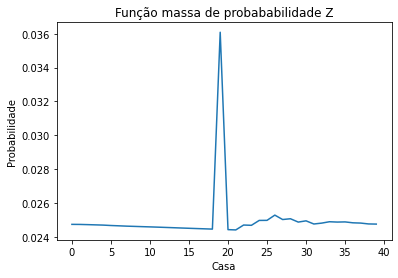


Função massa de probabilidade de Z: 

|   Casa |   Probabilidade |
|--------+-----------------|
|      1 |       0.0247301 |
|      2 |       0.0247262 |
|      3 |       0.0247143 |
|      4 |       0.0247007 |
|      5 |       0.0246866 |
|      6 |       0.0246623 |
|      7 |       0.0246444 |
|      8 |       0.0246247 |
|      9 |       0.0246102 |
|     10 |       0.0245948 |
|     11 |       0.0245807 |
|     12 |       0.0245654 |
|     13 |       0.0245488 |
|     14 |       0.024532  |
|     15 |       0.0245147 |
|     16 |       0.0244983 |
|     17 |       0.0244817 |
|     18 |       0.024466  |
|     19 |       0.0244501 |
|     20 |       0.0360869 |
|     21 |       0.024418  |
|     22 |       0.0244017 |
|     23 |       0.0246904 |
|     24 |       0.0246741 |
|     25 |       0.024963  |
|     26 |       0.0249671 |
|     27 |       0.0252764 |
|     28 |       0.025016  |
|     29 |       0.025062  |
|     30 |       0.024865  |
|     31 |       0.0249379 |
|   

In [ ]:
F = funcaoMassaDePosicao(P)
casaMaisVisitada = valorEsperado(F)

print(f'\nCasa em que o jogador passa mais tempo, em média: {casaMaisVisitada}\n')
plotarFuncaoMassa(F, 'Função massa de probababilidade Z')

print(f'\nFunção massa de probabilidade de Z: \n')

tabelaZDados = []

for i in range(len(F)):
  tabelaZDados.append([i + 1, F[i]])

print(tabulate(tabelaZDados, headers=['Casa', 'Probabilidade'], tablefmt='orgtbl'))

## Construção da matriz de transição sem a regra da prisão

In [ ]:
PSemPrisao = numpy.zeros((40, 40))

somaValores = somaValoresIguais + somaValoresDistintos

probabilidadeGeral = []

somaSemRepeticao = list(dict.fromkeys(somaValores))

for i in somaSemRepeticao:
  probabilidadeGeral.append(somaValores.count(i) / totalDeRolagens)

for i in range(0, 40):
  for j in range(0, 40):
    if (j - i) % 40 in somaSemRepeticao:
      PSemPrisao[i][j] = probabilidadeGeral[(j - i) % 40 - 3]

## Gráfico e valores da função W (sem a regra da prisão)

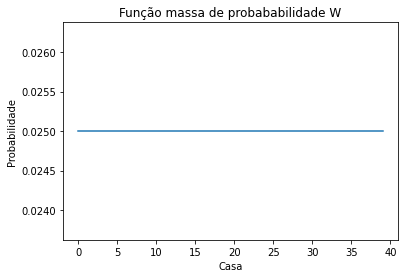


Função massa de probabilidade de W: 

|   Casa |   Probabilidade |
|--------+-----------------|
|      1 |           0.025 |
|      2 |           0.025 |
|      3 |           0.025 |
|      4 |           0.025 |
|      5 |           0.025 |
|      6 |           0.025 |
|      7 |           0.025 |
|      8 |           0.025 |
|      9 |           0.025 |
|     10 |           0.025 |
|     11 |           0.025 |
|     12 |           0.025 |
|     13 |           0.025 |
|     14 |           0.025 |
|     15 |           0.025 |
|     16 |           0.025 |
|     17 |           0.025 |
|     18 |           0.025 |
|     19 |           0.025 |
|     20 |           0.025 |
|     21 |           0.025 |
|     22 |           0.025 |
|     23 |           0.025 |
|     24 |           0.025 |
|     25 |           0.025 |
|     26 |           0.025 |
|     27 |           0.025 |
|     28 |           0.025 |
|     29 |           0.025 |
|     30 |           0.025 |
|     31 |           0.025 |
|   

In [ ]:
from numpy.linalg import matrix_power
import matplotlib.pyplot as pyplot

def funcaoMassaDePosicao2(P):
  Pn = matrix_power(P, 1000000)

  p = numpy.zeros((1, len(Pn[0])))
  p[0][0] = 1

  pn = numpy.matmul(p, Pn)

  probabilidades = numpy.zeros(40)

  for i in range(40):
    probabilidades[i % 40] += pn[0][i]

  return probabilidades

F = funcaoMassaDePosicao2(PSemPrisao)
tabelaWDados = []

for i in range(len(F)):
  tabelaWDados.append([i + 1, F[i]])

plotarFuncaoMassa(F, 'Função massa de probababilidade W')

print(f'\nFunção massa de probabilidade de W: \n')
print(tabulate(tabelaWDados, headers=['Casa', 'Probabilidade'], tablefmt='orgtbl'))

## Discussão dos resultados

A função Z possui uma distribuição de probabilidade relativamente homogênea, com excessão da casa 20 que possui maior chance de jogador estar presente após um tempo suficientemente longo. Nesse contexto, é esperado que o jogador passe mais tempo na casa 20, uma vez que há maior probabilidade dele estar nessa casa. Possivelmente, isso ocorre devido à particularidade da prisão localizar-se na casa 20, o que desfaz a homogeniedade da distribuição de probabilidade.

Ao analisarmos a função massa de probabilidade W, que não possui a regra da prisão, nota-se que a distribuição de probabilidade é completamente homogênea. Dessa forma, é possível inferir que essa regra de prisão é responsável por essa concentração de probabilidade na casa 20, o que acarreta nesse tempo a mais que o jogador passa na prisão, tanto visitando quanto como prisioneiro.